In [3]:
!pip install pmdarima

!pip install armagarch

!pip install arch

In [4]:
import math
import matplotlib.pyplot as plt
import keras 
import pandas as pd

import numpy as np
from keras.models import Sequential
from keras.layers import Dense 

from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from keras.models import load_model


from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
from numpy import concatenate

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime


In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt

from matplotlib.pylab import rcParams

from pmdarima.arima import auto_arima

import armagarch as ag

from statsmodels.tsa.arima_model import ARIMA
from tqdm import tqdm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [6]:
dfa = pd.read_csv("AAPL.csv")
dfb = pd.read_csv("FB.csv")


FileNotFoundError: ignored

In [10]:
dft = pd.read_csv("TESLA.csv")

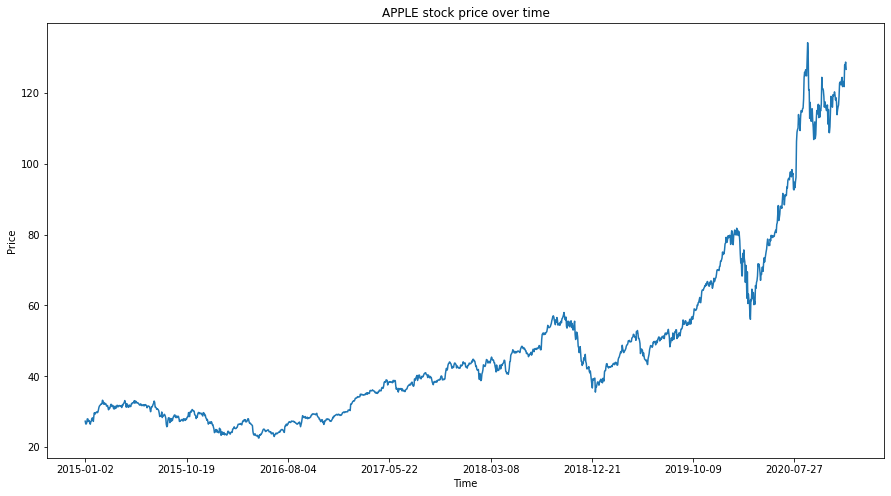

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(dfa["Date"], dfa["Close"])
plt.xticks(np.arange(0,1500, 200), dfa['Date'][0:1500:200])
plt.title("APPLE stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
plt.savefig("Apple Stock Price.jpg")

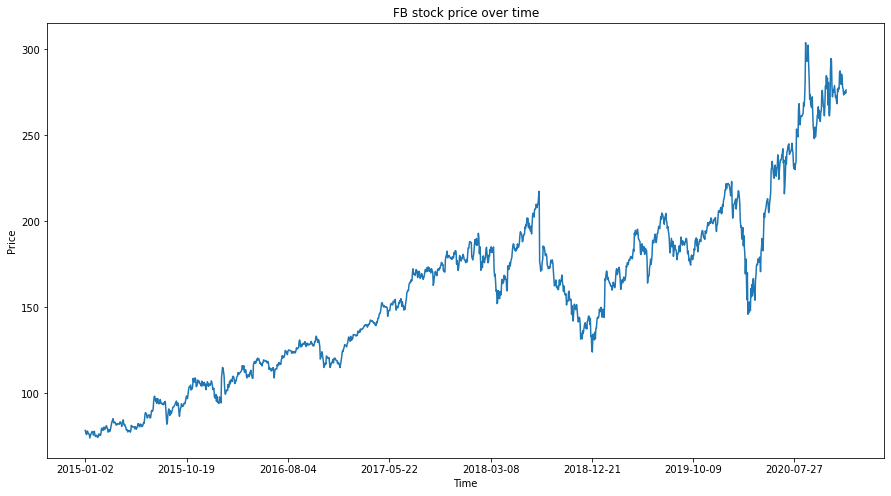

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(dfb["Date"], dfb["Close"])
plt.xticks(np.arange(0,1500, 200), dfb['Date'][0:1500:200])
plt.title("FB stock price over time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()
plt.savefig("FB Stock Price.jpg")

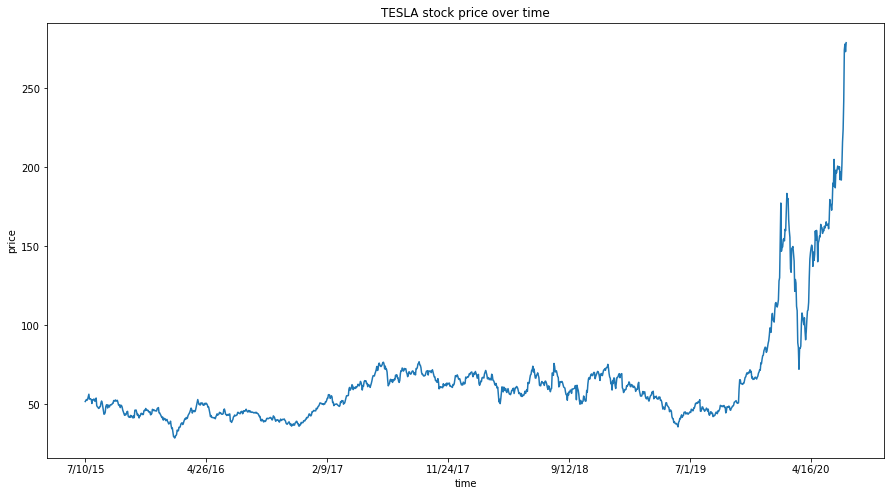

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(dft["Date"], dft["Close"])
plt.xticks(np.arange(0,1259, 200), dft['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()
plt.savefig("Tesla Stock Price")

In [7]:
X_train_a = dfa[:1052]['Close'].values
X_test_a = dfa[1052:]['Close'].values

X_train_b = dfb[:1052]['Close'].values
X_test_b = dfb[1052:]['Close'].values




NameError: ignored

In [12]:
X_train_t = dft[:881]['Close'].values
X_test_t = dft[881:]['Close'].values

Apple, FB, TESLA Non Rolling ARIMA

In [ ]:
model_a = auto_arima(X_train_a, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1839.159, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1844.925, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1846.767, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1846.748, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1843.637, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1847.399, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1847.206, Time=0.77 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1847.837, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1850.976, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1846.261, Time=0.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1849.111, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1848.992, Time=0.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.87 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.34 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] interc

In [ ]:
model_b = auto_arima(X_train_b, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5027.914, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5033.670, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5035.551, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5035.545, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5032.797, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5032.172, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5035.416, Time=1.46 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5035.445, Time=1.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5031.244, Time=0.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5033.715, Time=0.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5033.542, Time=1.10 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5027.803, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5

In [13]:
model_t = auto_arima(X_train_t, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3335.112, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3336.155, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3336.193, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3333.214, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3337.976, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.513 seconds


Apple Rolling ARIMA

In [ ]:
train_data, test_data = dfa[0:int(len(dfa)*0.7)], dfa[int(len(dfa)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

1052

In [ ]:
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,2))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 1.9972531082315275
Testing Mean Absolute Error is 1.3064731295022254


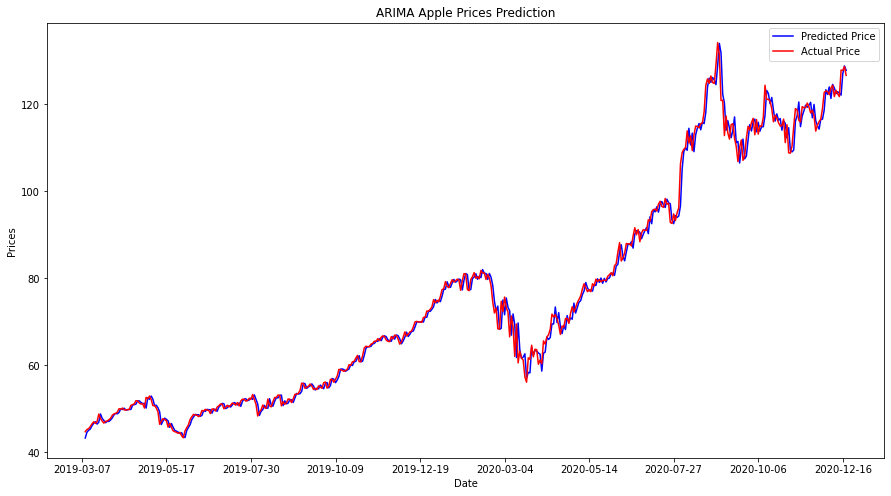

<Figure size 432x288 with 0 Axes>

In [ ]:
test_set_range = dfa[int(len(dfa)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA Apple Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1050,1503,50), dfa.Date[1050:1503:50])
plt.legend()
plt.show()
plt.savefig("ARIMA Price Apple")

Tesla ARIMA

In [14]:
train_data, test_data = dft[0:int(len(dft)*0.7)], dft[int(len(dft)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

881

In [17]:
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 12.157823488794373
Testing Mean Absolute Error is 3.6179568659230728


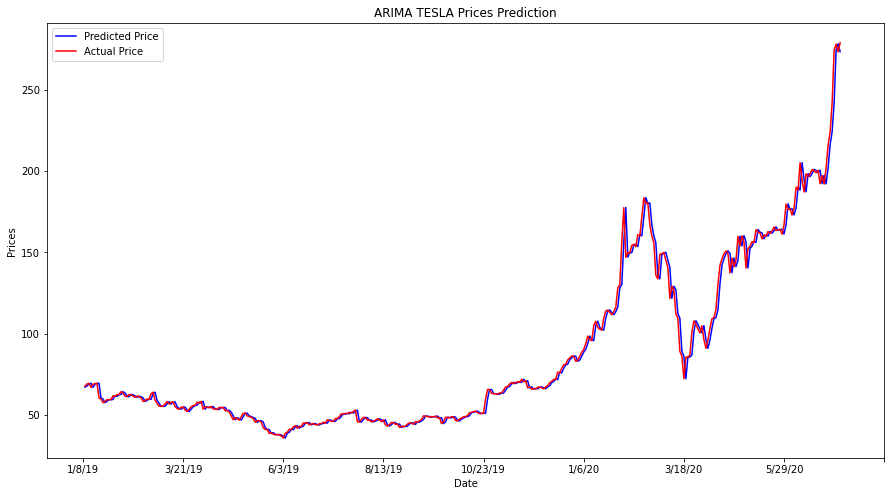

<Figure size 432x288 with 0 Axes>

In [ ]:
test_set_range = dft[int(len(dft)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(880,1300,50), dft.Date[880:1300:50])
plt.legend()
plt.show()
plt.savefig("ARIMA Price TESLA")

Facebook ARIMA

In [ ]:
train_data, test_data = dfb[0:int(len(dfb)*0.7)], dfb[int(len(dfb)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
len(history)

1052

In [ ]:
model_predictions = []

N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(0,1,0))
    model_fit=model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE = sqrt(mean_squared_error(test_data, model_predictions))
ABSE = mean_absolute_error(test_data, model_predictions)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 7.438284658776395
Testing Mean Absolute Error is 3.7237793443982614


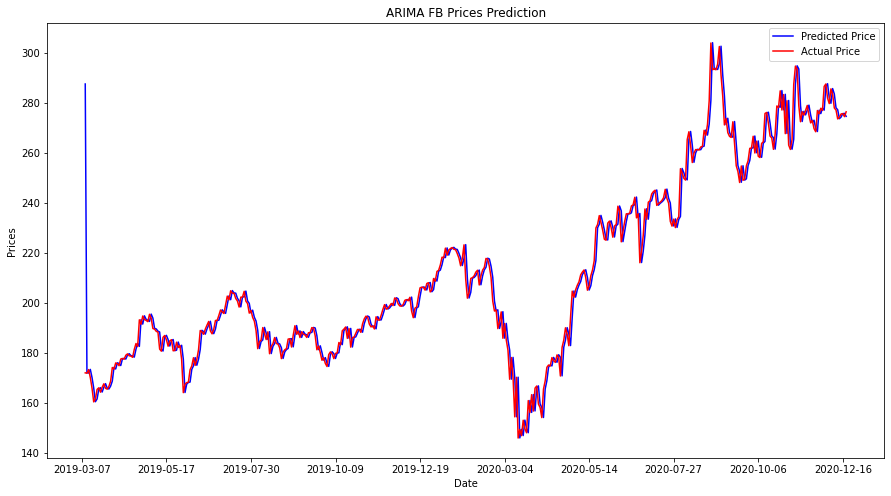

<Figure size 432x288 with 0 Axes>

In [ ]:
test_set_range = dfb[int(len(dfb)*0.7):].index
plt.figure(figsize=(15,8))
plt.plot(test_set_range, model_predictions, color='blue',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('ARIMA FB Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1050,1503,50), dfa.Date[1050:1503:50])
plt.legend()
plt.show()
plt.savefig("ARIMA Price FB")

APPLE ARMA GARCH

In [ ]:
from arch import arch_model
from arch.univariate import ZeroMean, GARCH, StudentsT, ConstantMean

In [ ]:


def returns_predict(period):
    np.random.seed(100)
    returns_pool = []
    for i in range(period):
        sigma_t = res.conditional_volatility.iloc[-1]
        epsilon_t = sigma_t * np.random.standard_normal()
        sigma_forecast = np.sqrt(omega + alpha * epsilon_t ** 2 + beta * sigma_t ** 2)
        epsilon_forecast = sigma_forecast * np.random.standard_normal()
        returns_forecast = mu + epsilon_forecast + theta * epsilon_t
        returns_pool.append(returns_forecast)
        sigma_t = sigma_forecast
    return returns_pool









In [ ]:
train_data, test_data = dfa[0:1052], dfa[1052:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']

In [ ]:
pred = returns_predict(451)

In [ ]:
train_data.iloc[1051,4:5]

Close    43.2275
Name: 1051, dtype: object

In [ ]:
last_val = math.log(train_data.iloc[1051,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

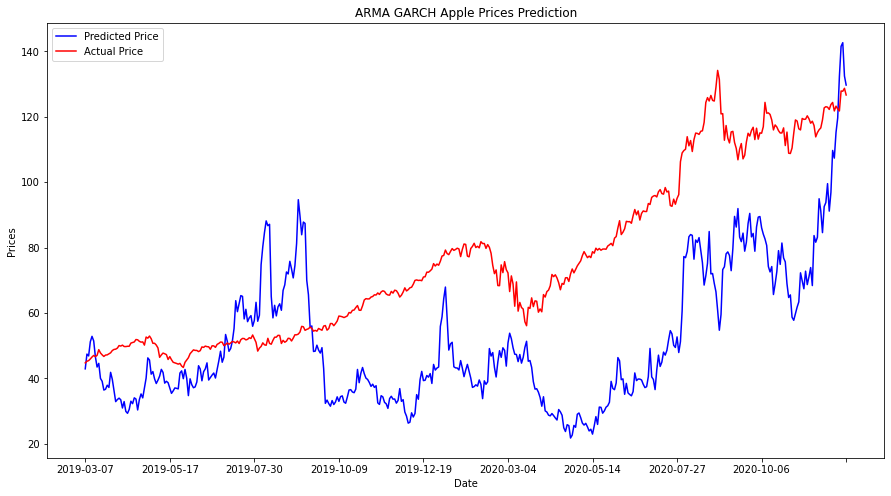

In [ ]:
x = dfa.loc[1052: , "Date"] 
y =  dfa.iloc[1052: , 4:5].values.reshape(451,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH Apple Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[1050:1500:50])
plt.legend()
plt.show()

In [ ]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 32.756557759888565
Testing Mean Absolute Error is 28.43514425874562


FACEBOOK ARMA GARCH

In [ ]:
train_data, test_data = dfb[0:1052], dfb[1052:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

In [ ]:
test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']
pred = returns_predict(451)

In [ ]:
last_val = math.log(train_data.iloc[1051,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

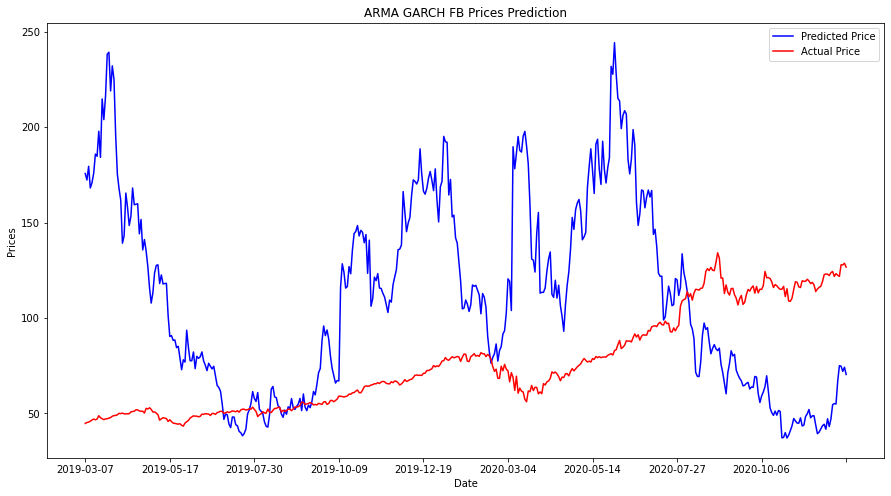

In [ ]:
x = dfa.loc[1052: , "Date"] 
y =  dfa.iloc[1052: , 4:5].values.reshape(451,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH FB Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[1050:1500:50])
plt.legend()
plt.show()

In [ ]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 70.85472658755786
Testing Mean Absolute Error is 58.15016950041405


TSLA ARMA GARCH

In [ ]:
train_data, test_data = dft[0:880], dft[880:]
returns = pd.DataFrame(np.log(train_data['Close']).diff().dropna())
returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)
arma_mod01 = sm.tsa.ARMA(returns, (1, 0)).fit()
arch_mod = ConstantMean(returns)
arch_mod.volatility = GARCH(1,0,1)
arch_mod.distribution = StudentsT()
res=arch_mod.fit(update_freq=5, disp='off')
mu = arma_mod01.params[0]
theta = arma_mod01.params[1]
omega = res.params[1]
alpha = res.params[2]
beta = res.params[3]

In [ ]:
test_returns = pd.DataFrame(np.log(test_data['Close']).diff().dropna())

test_returns.rename(columns={'Close':'Log Return Rate'}, inplace=True)

test_returns['Close'] = test_data['Close']
pred = returns_predict(379)

In [ ]:
last_val = math.log(train_data.iloc[879,4:5])
last_val
first_value = last_val+pred[0]
log_return = [first_value]
for i in range(1,len(pred)):
  next_value=log_return[i-1]+pred[i]
  log_return.append(next_value)

predicted_price = np.exp(log_return)

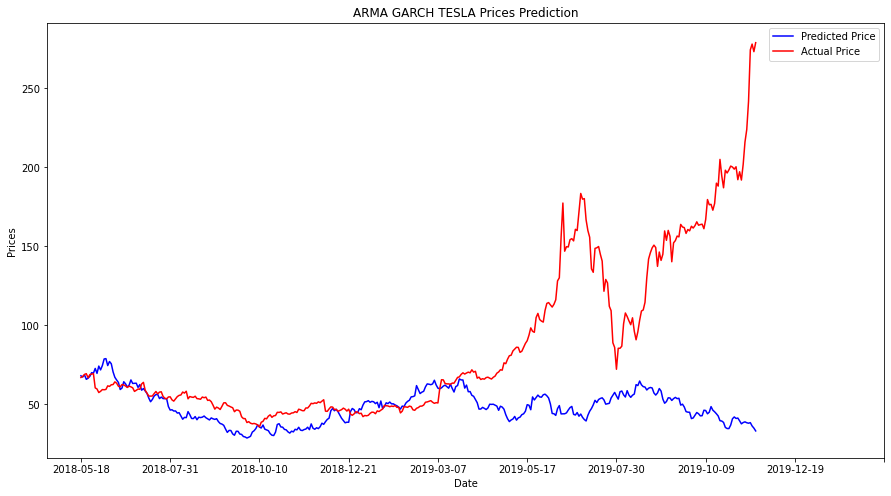

In [ ]:
x = dft.loc[880: , "Date"] 
y =  dft.iloc[880: , 4:5].values.reshape(379,) 

plt.figure(figsize=(15,8))
plt.plot(x, predicted_price, color='blue',label='Predicted Price')
plt.plot(x, y, color='red', label='Actual Price')
plt.title('ARMA GARCH TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,500,50), dfa.Date[850:1300:50])
plt.legend()
plt.show()

In [ ]:
RMSE = sqrt(mean_squared_error(y, predicted_price))
ABSE = mean_absolute_error(y, predicted_price)
print('Testing Root Mean Squared Error is {}'.format(RMSE))
print('Testing Mean Absolute Error is {}'.format(ABSE))

Testing Root Mean Squared Error is 66.09426547244446
Testing Mean Absolute Error is 40.94999563503374


Moving Average (1, 60) Model

In [ ]:
sma_1 = dfa.iloc[1199:-1, 4:5].rolling(1).mean().values


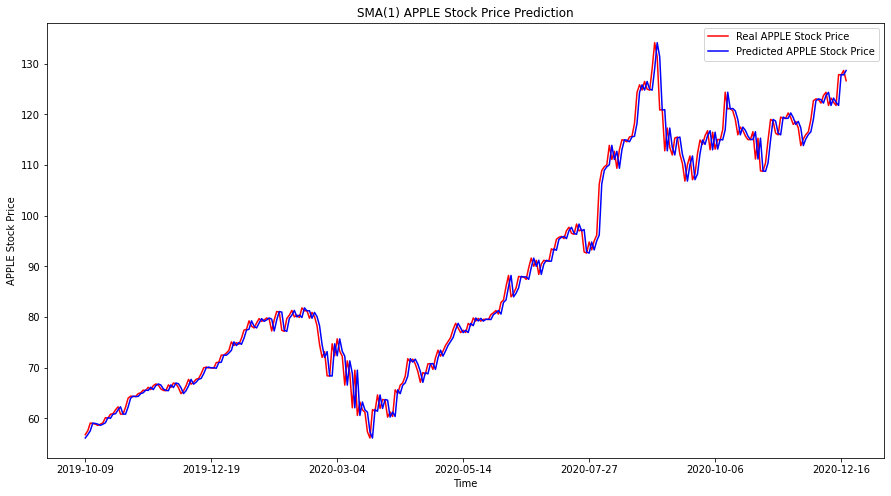

In [ ]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(dfa.loc[1200:, "Date"],sma_1, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(1) APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)

1.6154784422442219 2.3717436733559074


In [ ]:
sma_60 = dfa.iloc[1199:-1, 4:5].rolling(60).mean().values


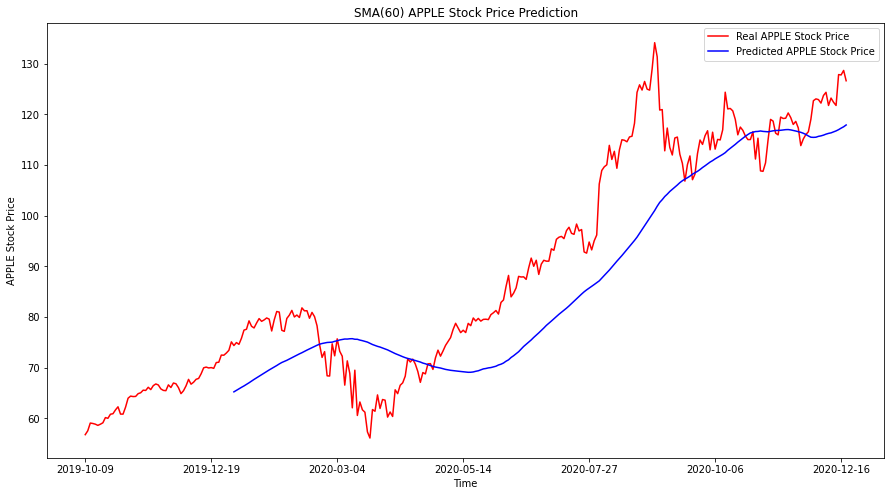

In [ ]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(dfa.loc[1200:, "Date"],sma_60, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(60) APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse)

9.347390164334726 11.512656907271278


Exponential Moving Average

In [ ]:
ema60 = dfa.iloc[1199:-1, 4:5].ewm(span=60).mean().values

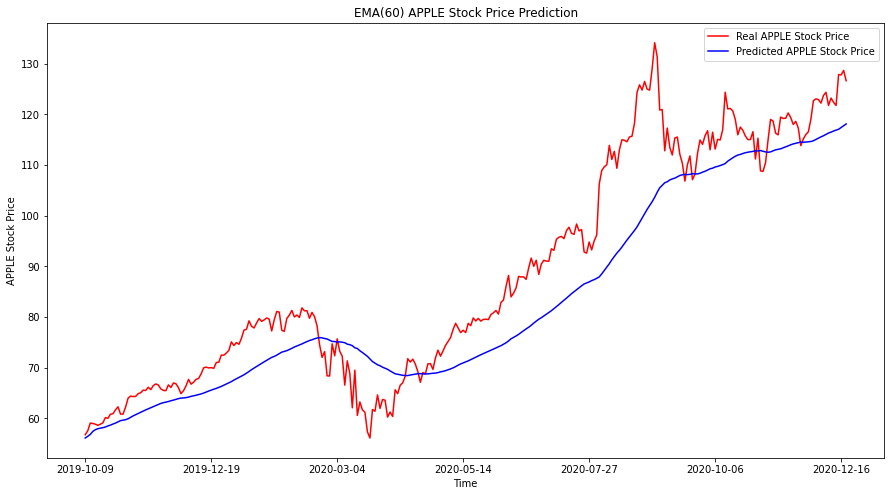

In [ ]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(dfa.loc[1200:, "Date"],ema60, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(60) APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse)

8.259518632757155 10.111271032186577


In [ ]:
ema1 = dfa.iloc[1199:-1, 4:5].ewm(span=1).mean().values

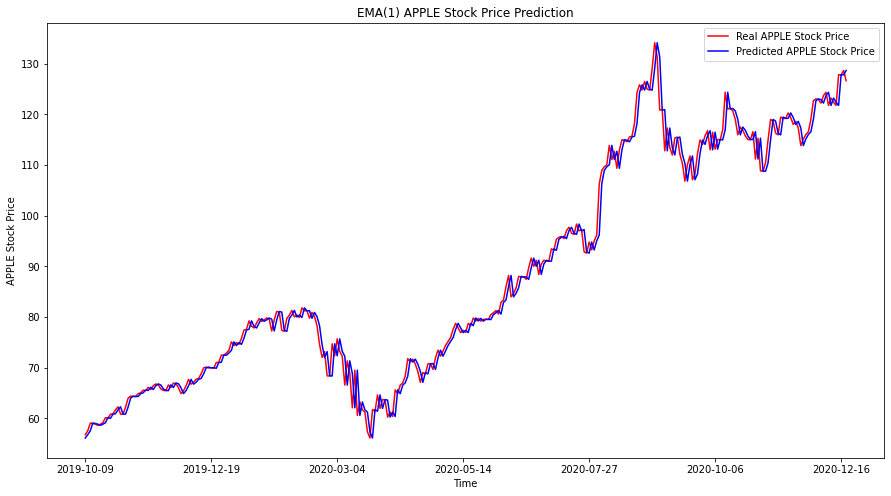

In [ ]:
x = dfa.loc[1200: , "Date"] 
y =  dfa.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real APPLE Stock Price")
plt.plot(dfa.loc[1200:, "Date"],ema1, color = "blue", label = "Predicted APPLE Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(1) APPLE Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('APPLE Stock Price')
plt.legend()
plt.show() 

In [ ]:
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)

1.6154784422442243 2.37174367335591


Fb MA

4.045512072607247 5.811164860176795


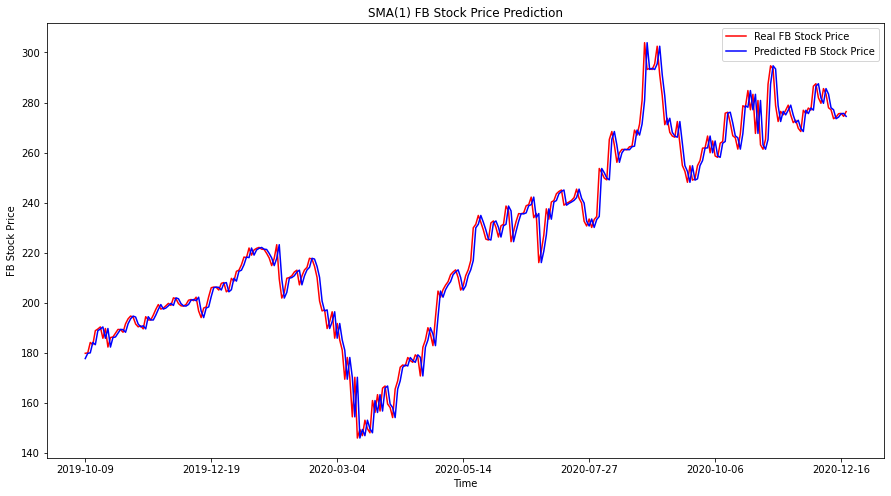

In [ ]:
sma_1 = dfb.iloc[1199:-1, 4:5].rolling(1).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,) 
# Visualising the results
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(dfb.loc[1200:, "Date"],sma_1, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(1) FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

19.864993879355293 24.92598479731426


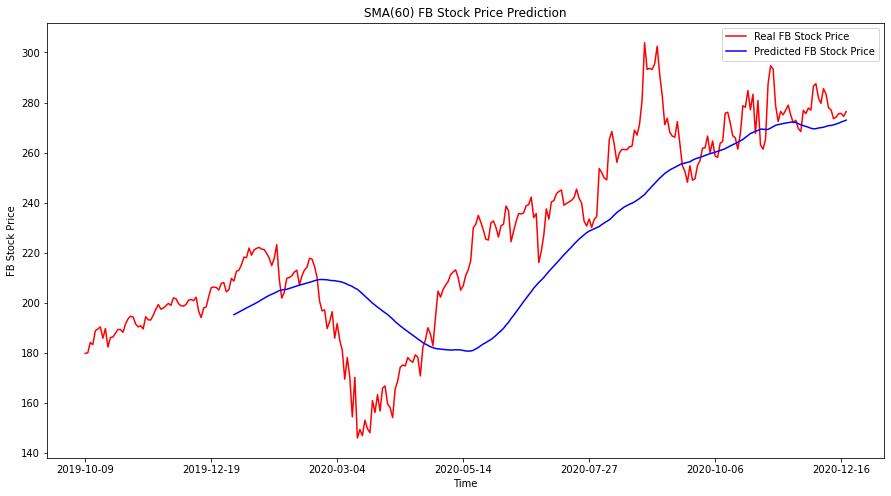

In [ ]:
sma_60 = dfb.iloc[1199:-1, 4:5].rolling(60).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(dfb.loc[1200:, "Date"],sma_60, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('SMA(60) FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show()

17.086352004737826 21.109205920498397


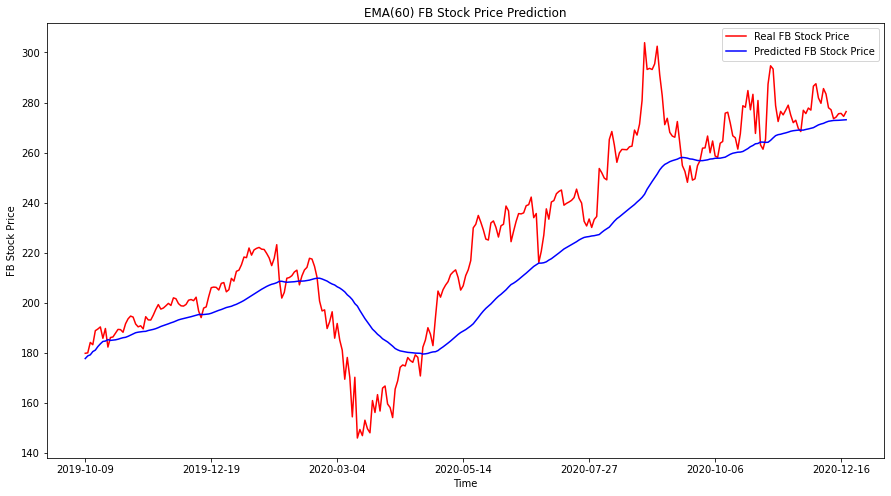

In [ ]:
ema60 = dfb.iloc[1199:-1, 4:5].ewm(span=60).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,)
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(dfb.loc[1200:, "Date"],ema60, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(60) FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

4.045512072607258 5.8111648601768024


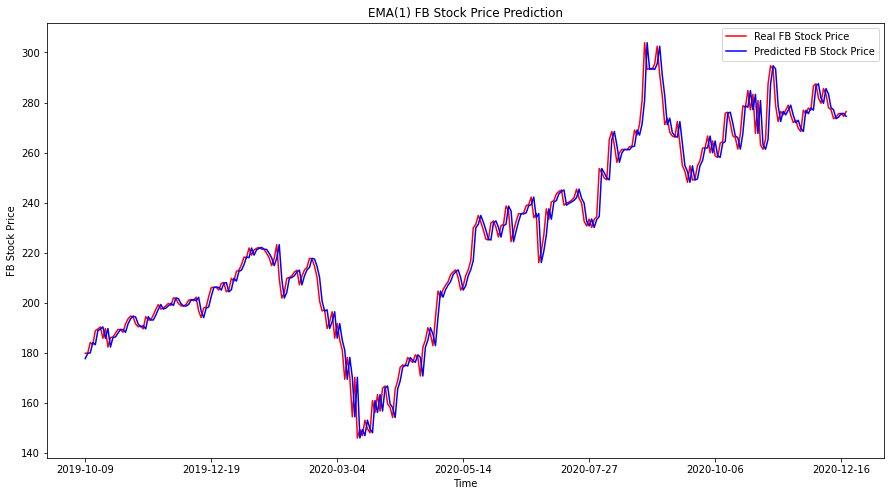

In [ ]:
ema1 = dfb.iloc[1199:-1, 4:5].ewm(span=1).mean().values
x = dfb.loc[1200: , "Date"] 
y =  dfb.iloc[1200: , 4:5].values.reshape(303,) 
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(dfb.loc[1200:, "Date"],ema1, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,302,50))
plt.title('EMA(1) FB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 

TESLA MA

2.8711872321899774 5.351368957379031


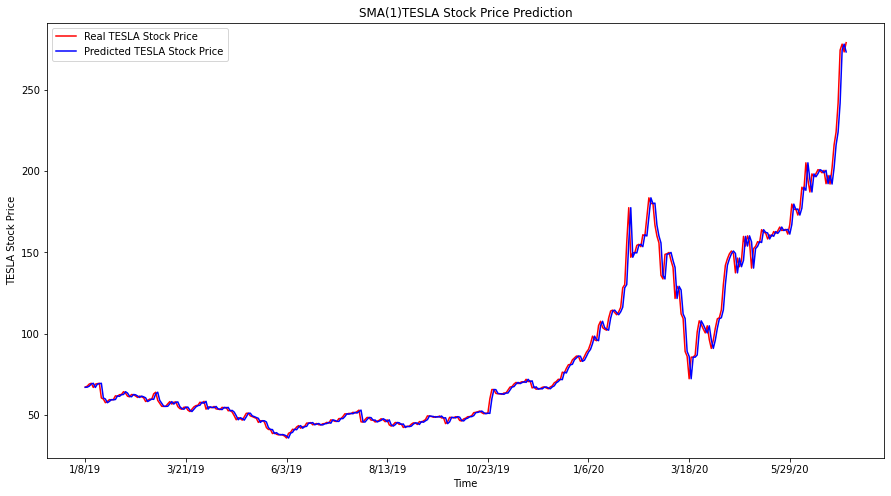

In [ ]:
sma_1 = dft.iloc[879:-1, 4:5].rolling(1).mean().values
x = dft.loc[880: , "Date"] 
y =  dft.iloc[880: , 4:5].values.reshape(379,) 
# Visualising the results
abse = mean_absolute_error(sma_1, y)
rmse = math.sqrt(mean_squared_error(sma_1,y))

print(abse,rmse)
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(dft.loc[880:, "Date"],sma_1, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,400,50))
plt.title('SMA(1)TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 

19.593234006060612 28.39745006726546


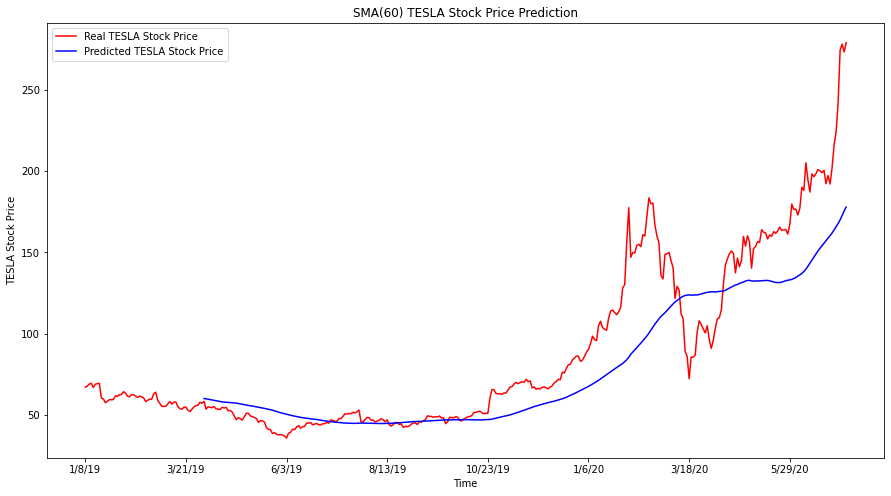

In [ ]:
sma_60 = dft.iloc[879:-1, 4:5].rolling(60).mean().values
x = dft.loc[880: , "Date"] 
y =  dft.iloc[880: , 4:5].values.reshape(379,)
abse = mean_absolute_error(sma_60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(sma_60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(dft.loc[880:, "Date"],sma_60, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,400,50))
plt.title('SMA(60) TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

17.407456396979356 25.575086453831105


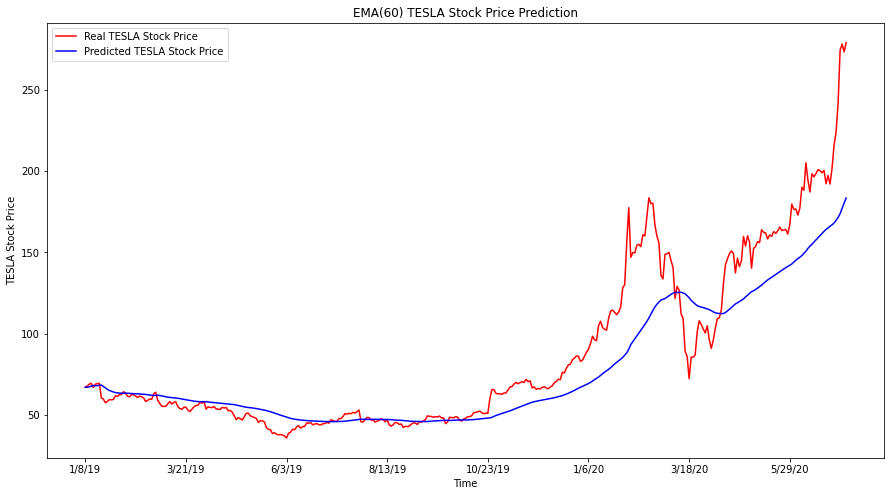

In [ ]:
ema60 = dft.iloc[879:-1, 4:5].ewm(span=60).mean().values
x = dft.loc[880: , "Date"] 
y =  dft.iloc[880: , 4:5].values.reshape(379,)
abse = mean_absolute_error(ema60[60:], y[60:])
rmse = math.sqrt(mean_squared_error(ema60[60:],y[60:]))

print(abse,rmse) 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(dft.loc[880:, "Date"],ema60, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,400,50))
plt.title('EMA(60) TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

2.871187232189974 5.351368957379026


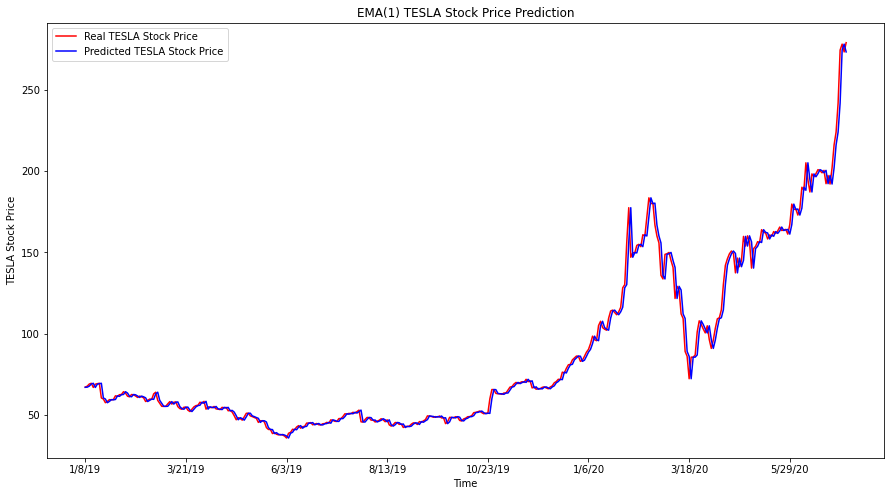

In [ ]:
ema1 = dft.iloc[879:-1, 4:5].ewm(span=1).mean().values
x = dft.loc[880: , "Date"] 
y =  dft.iloc[880: , 4:5].values.reshape(379,) 
abse = mean_absolute_error(ema1, y)
rmse = math.sqrt(mean_squared_error(ema1,y))

print(abse,rmse)
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(dft.loc[880:, "Date"],ema1, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,400,50))
plt.title('EMA(1) TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 